## Final Project Submission

* Student name: Evan Okin
* Student pace: Self-paced
* Scheduled project review date/time: Completed (September 6, 5 PM EST)
* Instructor name: Eli Thomas

<font color='blue'>This is Evan Okin's project for FlatIron Data Bootcamp's Module 1. I explore a data-set which includes variables that could be potential predictors of house prices. My approach is to load in the data, explore the data, clean the data, and analyze relationships between predictors and house prices. The goal is to use a multiple linear regression which will contain several variables that might contribute to house prices. I will iterate several versions of regression in order to remove variables that turn out to be faulty or don't provide significant value for our model - the dataset has many potential variables to explore. After my final iteration, the model output will hopefully be intuitive enough to provide an understanding for how we can utilize this information to our advantage in a business or personal portfolio context. </font>

<font color='green'>Import the data.</font>

In [1]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv')

<font color='green'>Display the first several rows of the data to make sure that it loaded in properly.</font>

In [2]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


<font color='green'>There are many variables that might influence the variable "price" of a house. For example, intuitively, the number of bedrooms should have a positive relationship with home values, which we will check later.</font>

<font color='green'>Analyze the dataset using built-in pandas and numpy methods.</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
import numpy as np
np.shape(df)

(21597, 21)

<font color='green'>The dataset has over 21,000 rows and 21 columns...a lot to work with!</font>

<font color='green'>Let's set the index to be equal to the id values (since there will be no predictive value in them as independent variables)</font>

In [5]:
df.set_index('id',inplace=True)
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [6]:
df.hist(bins=20,figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1155046d8>,
      dtype=object)

<font color='green'>Let's explore the "date" column.</font>

In [7]:
df['date'].describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

<font color='green'>It is likely that we won't be using dates to predict home value. We won't be able to use dates in the past to predict anything about the future. Let's drop the variable.</font>

In [8]:
df=df.drop('date',axis=1)

<font color='green'>Let's explore the dataset to see if there are missing values.</font>

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
for element in df.columns:
    if df[element].isna().sum()>0:
        print(element)

waterfront
view
yr_renovated


In [11]:
round((df['waterfront'].isna().sum())/df['waterfront'].count(),3)

0.124

<font color='green'>12.4% of the "waterfront" data is missing, which we will address soon.</font>

In [12]:
round((df['view'].isna().sum())/df['view'].count(),3)

0.003

<font color='green'>0.3% of the "view" data is missing, which we will address soon.</font>

In [13]:
round((df['yr_renovated'].isna().sum())/df['yr_renovated'].count(),3)

0.216

<font color='green'>21.6% of the "yr_renovated" data is missing, which we will address soon.</font>

<font color='green'>Let's take care of the missing values in the "waterfront" column.</font>

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Waterfront Histogram')

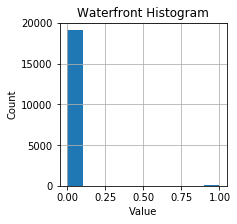

In [15]:
df['waterfront'].hist(figsize=(3,3))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Waterfront Histogram')

<font color='green'>The overwhelming majority of values are 0, i.e., indicative that the property is not waterfront. Let's replace all blank values with 0, the mode.</font>

In [16]:
df['waterfront'].fillna(0,inplace=True)

In [17]:
df['waterfront'].isna().sum()

0

<font color='green'>Let's take care of the missing values in the "view" column.</font>

Text(0.5, 1.0, 'View Histogram')

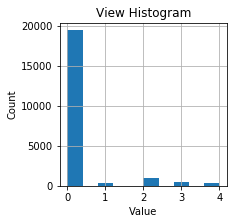

In [18]:
df['view'].hist(figsize=(3,3))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('View Histogram')

<font color='green'>Once again, the overwhelming majority of values are 0. Let's replace all blank values with 0, the mode.</font>

In [19]:
df['view'].fillna(0,inplace=True)

In [20]:
df['view'].isna().sum()

0

<font color='green'>Let's take care of the missing values in the "yr_renovated" column.</font>

In [21]:
df['yr_renovated'].isna().sum()

3842

In [22]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Text(0.5, 1.0, 'Yr_Renovated Histogram')

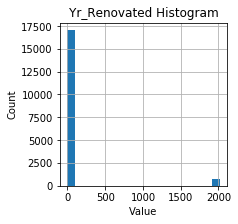

In [23]:
df['yr_renovated'].hist(figsize=(3,3),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Yr_Renovated Histogram')

In [24]:
df.yr_renovated.value_counts().head(8)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
Name: yr_renovated, dtype: int64

<font color='green'>The majority of homes have not been renovated, so let's replace missing values with 0.</font>

In [25]:
df['yr_renovated'].fillna(0,inplace=True)

<font color='green'>Let's see if there are any null values, or if we took care of them all.</font>

In [26]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font color='green'>Great, no missing values.</font>

<font color='green'>We can now analyze the other columns further.</font>

<font color='green'>Let's look at "bedrooms".</font>

In [27]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [28]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<font color='green'>We can see that there's actually a house with 33(!) bedrooms. Let's look to see if there are a lot of houses with double-digit number of bedrooms.</font>

In [29]:
df.loc[df['bedrooms']>9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
627300145,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
5566100170,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8812401450,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [30]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<font color='green'>The house with 33 bedrooms looks like an outlier that was likely mistyped. We could either set it equal to the next max bedrooms, we could assume that it was a typo and was intended to be a "3", or we can just drop the row entirely. All methods have their merits. We'll keep it in as 33 for now but drop it as an outlier in a further section. </font>

<font color='green'>Let's analyze the "bathrooms" column.</font>

In [31]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<font color='green'>While half bathrooms exist, it is strange that we are seeing quarter and three-quarter bathrooms. Let's fix that by rounding to the nearest half bathroom. </font>

In [32]:
df['bathrooms']=df['bathrooms'].map(lambda x: round(x*2)/2)

In [33]:
df['bathrooms'].value_counts()

2.0    7025
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

<font color='green'>Let's drop "latitude" and "longitude". We'll keep in zipcode to include location in the model.</font>

In [34]:
df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)

<font color='green'>Let's explore "zipcode".</font>

In [35]:
df.zipcode.value_counts().nunique()

65

In [36]:
df.zipcode.count()/df.zipcode.value_counts().nunique()

332.26153846153846

<font color='green'>Our model might get clunky if we use 65 zipcodes. Note, however, that there is an average of 332 values per zipcode, which should be sufficient for helpful predictions, if we want to use all of these variables. </font>

<font color='green'>Let's explore "floors".</font>

In [37]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

<font color='green'>This looks completely normal. We can view this in a pie chart as well.</font>

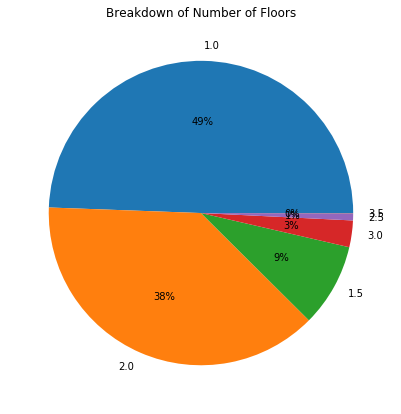

In [38]:
import seaborn as sns
labels=df['floors'].value_counts().index
sizes=df['floors'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,autopct='%1.0f%%')
plt.title('Breakdown of Number of Floors')
plt.show()

<font color='green'>It's slightly cluttered, but we can easily see that the majority of homes have either 1 or 2 floors.</font>

<font color='green'>Let's explore "condition".</font>

In [39]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

<font color='green'>This looks completely normal.</font>

<font color='green'>Let's explore "grade".</font>

In [40]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<font color='green'>Let's explore "yr_built".</font>

In [41]:
df['yr_built'].value_counts().nunique()

99

In [42]:
df=df.drop('yr_built',axis=1)

<font color='green'>Let's explore "yr_renovated".</font>

In [43]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

<font color='green'>There are 70 different values for year renovated.</font>

In [44]:
df=df.drop('yr_renovated',axis=1)

<font color='green'>Let's look at square footage columns.</font>

Text(0.5, 1.0, 'Sqft_Living Histogram')

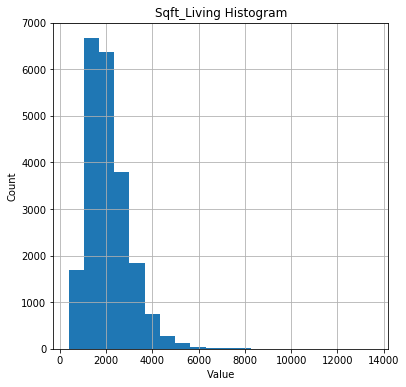

In [45]:
df['sqft_living'].hist(figsize=(6,6),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sqft_Living Histogram')

Text(0.5, 1.0, 'Sqft_Lot Histogram')

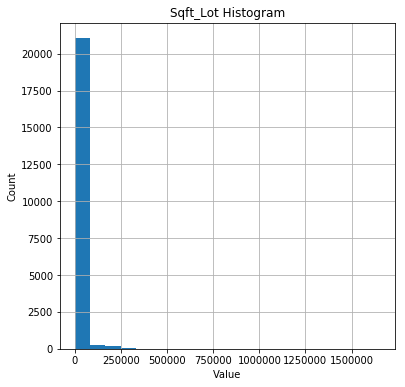

In [46]:
df['sqft_lot'].hist(figsize=(6,6),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sqft_Lot Histogram')

In [47]:
df_sqft=df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

In [48]:
df_sqft.head(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,,,,,,
7129300520,1180,5650,1180,0.0,1340,5650
6414100192,2570,7242,2170,400.0,1690,7639
5631500400,770,10000,770,0.0,2720,8062


<font color='green'>It looks as though sqft_living = sqft_above + sqft_basement. Let's confirm this, and if so we'll remove sqft_living (because the information is fully captured in the other variables, and to avoid multicollinearity).</font>

In [49]:
df_sqft['sqft_basement'].value_counts().head(3)

0.0      12826
?          454
600.0      217
Name: sqft_basement, dtype: int64

In [50]:
df['sqft_basement']=df['sqft_living']-df['sqft_above']

<font color='green'>Confirm that there are no more ?'s on "sqft_basement".</font>

In [51]:
df.loc[df['sqft_basement']=='?']

/Users/evanokin/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,


In [52]:
df=df.drop('sqft_living',axis=1)

<font color='green'>The variable "sqft_lot15" is the square footage of the land lots of the nearest 15 neighbors. This is likely highly correlated with the "sqft_lot" variable. Let's verify and if so, delete the column for the land lots of the nearest 15 neighbors.</font>

In [53]:
print('The correlation coefficient between the variables "sqft_lot" and "sqft_lot15" is '
      + str(round(np.corrcoef(df['sqft_lot'],df['sqft_lot15'])[0,1],2))+'%')
if np.corrcoef(df['sqft_lot'],df['sqft_lot15'])[0,1]>0.50:
    df=df.drop('sqft_lot15',axis=1)

The correlation coefficient between the variables "sqft_lot" and "sqft_lot15" is 0.72%


In [54]:
df.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15
price,1.000000,0.308787,0.516635,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.323799,-0.053402,0.585241
bedrooms,0.308787,1.000000,0.516845,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.302808,-0.154092,0.393406
bathrooms,0.516635,0.516845,1.000000,0.088745,0.463986,0.064885,0.188103,-0.110984,0.648023,0.671168,0.295020,-0.200419,0.561429
sqft_lot,0.089876,0.032471,0.088745,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015418,-0.129586,0.144763
floors,0.256804,0.177944,0.463986,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.245715,-0.059541,0.280102
waterfront,0.264306,-0.002127,0.064885,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.082800,0.028923,0.083823
view,0.393497,0.078354,0.188103,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.273845,0.085059,0.278928
condition,0.036056,0.026496,-0.110984,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.173849,0.002888,-0.093072
grade,0.667951,0.356563,0.648023,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.168220,-0.185771,0.713867
sqft_above,0.605368,0.479386,0.671168,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,-0.052156,-0.261570,0.731767


Text(0.5, 1.0, 'Correlation Heatmap')

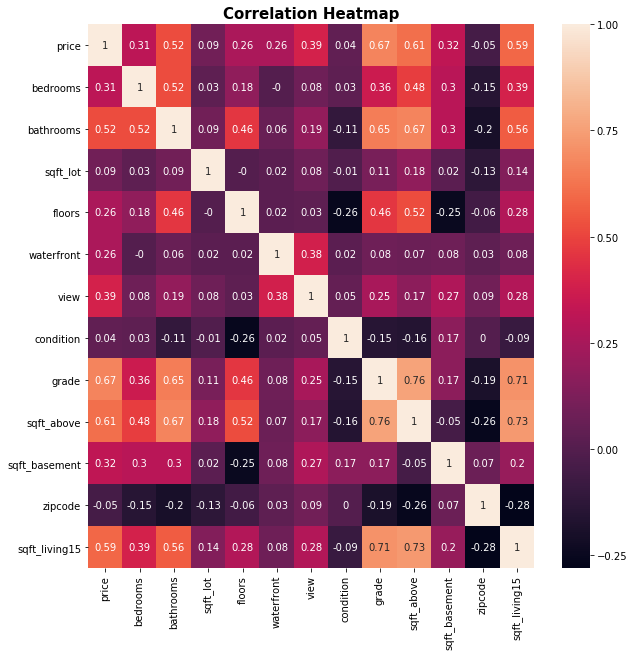

In [55]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(round(corr,2),annot=True)
corr.style.background_gradient(cmap='coolwarm')
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)

<font color='green'>We can also see that the variable "sqft_living15" is likely highly correlated with the "sqft_above" variable, and delete it.</font>

In [56]:
df.drop('sqft_living15',axis=1,inplace=True)

<font color='green'>This is our "first draft" cleaned up dataframe. We will have to do some work to make our variables more suited for regression (such as turning categorical variables into dummy variables), but we've dealt with missing values, removed outliers, and got rid of unnecessary columns. </font>

<font color='green'>We can save our dataframe to a csv file. </font>

In [57]:
df.to_csv('Cleaned_Data_KMC_Housing.csv')

<font color='green'>Let's visualize "grade" against "price".</font>

Text(0.5, 1.0, 'Scatter of Grade vs. Price')

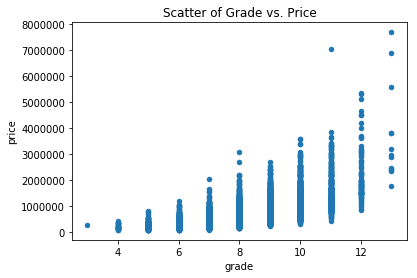

In [58]:
df.plot.scatter('grade','price')
plt.title('Scatter of Grade vs. Price')

<font color='green'>Let's observe 99th percentile of values to make sure that there doesn't seem to be anything crazy going on.</font>

In [59]:
df.quantile(q=.99)

price            1970000.0
bedrooms               6.0
bathrooms              4.0
sqft_lot          213008.0
floors                 3.0
waterfront             0.0
view                   4.0
condition              5.0
grade                 11.0
sqft_above          4370.0
sqft_basement       1660.0
zipcode            98199.0
Name: 0.99, dtype: float64

<font color='green'>Let's remove outliers so that they don't unnecessarily throw off model predictions.</font>

In [60]:
pre_outliers=len(df)
pre_outliers

21597

In [61]:
df = df[df.price < 1970000]
df = df[df.bedrooms < 6.0]
df = df[df.bathrooms < 4.0]
df = df[df.sqft_lot < 213008.0]
df = df[df.sqft_above < 4370.0]
df = df[df.sqft_basement < 1660.0]

In [62]:
post_outliers=len(df)
post_outliers

20324

In [63]:
'Proportion of data removed: ' + str(((pre_outliers-post_outliers)/pre_outliers))

'Proportion of data removed: 0.058943371764596936'

<font color='green'>Let's use grouping to analyze mean price by various variables.</font>

In [64]:
grouping_df=df.groupby(['grade','floors'],as_index=False)['price'].mean()
grouping_df

,grade,floors,price
0,3,1.0,2.620000e+05
1,4,1.0,2.137620e+05
2,4,1.5,1.900000e+05
3,5,1.0,2.427711e+05
4,5,1.5,2.685790e+05
5,5,2.0,2.475000e+05
6,6,1.0,2.936770e+05
7,6,1.5,3.398968e+05
8,6,2.0,3.025907e+05
9,6,2.5,3.612500e+05


<font color='green'>Generally, home prices increase for higher combinations of grades and floors.</font>

In [65]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode']

<font color='green'>Let's run an initial regression on this dataset.</font>

In [66]:
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode']

In [67]:
from statsmodels.formula.api import ols
dependent_vble = 'price'
#independent_vbles list already defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2198.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:39:55   Log-Likelihood:            -2.7426e+05
No. Observations:               20324   AIC:                         5.485e+05
Df Residuals:                   20312   BIC:                         5.486e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.783e+07   2.43e+06    -15.541

<font color='green'>Let's clean up the variables further, because as it currently stands, our model is unintuitive. For instance, the number of bedrooms and floors are negatively correlated with house prices in our multiple regression model. For our next iteration, we will scale/normalize our variables, create dummy variables for categorical variables, and deal with potential multicollinearity further. </font>

<font color='green'>Let's analyze our variables to see which are categorical and need to be made into dummy variables. </font>

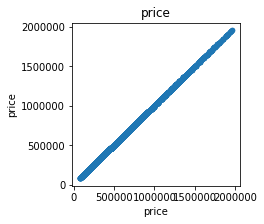

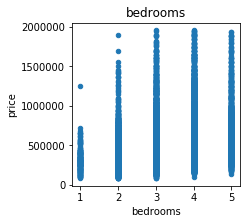

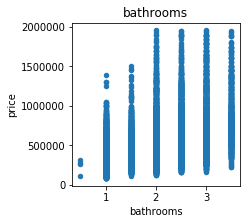

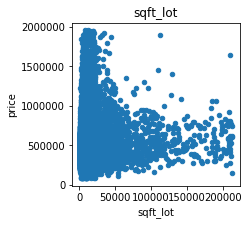

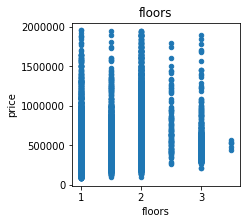

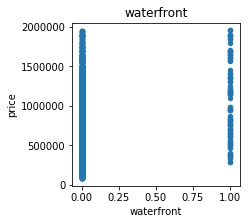

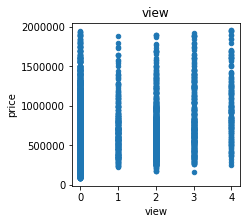

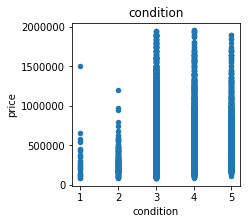

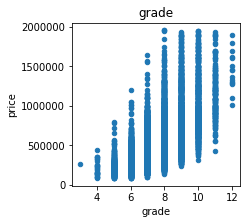

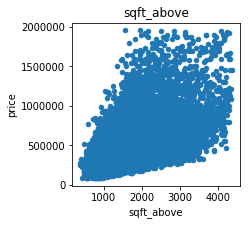

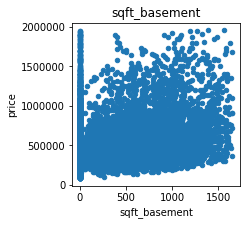

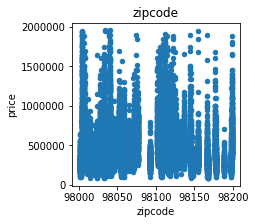

In [68]:
for element in df.columns:
    df.plot.scatter(element,'price',figsize=(3,3))
    plt.title(element)

<font color='green'>As we can see, "bedrooms," "bathrooms," "floors," "waterfront," "view," "condition," and "grade" are categorical and need to be addressed.</font>

In [69]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode'],
      dtype='object')

In [70]:
bed_dummies = pd.get_dummies(df['bedrooms'],prefix='bed')
bath_dummies = pd.get_dummies(df['bathrooms'],prefix='bath')
floors_dummies = pd.get_dummies(df['floors'],prefix='floors')
water_dummies = pd.get_dummies(df['waterfront'],prefix='water')
view_dummies = pd.get_dummies(df['view'],prefix='view')
cond_dummies = pd.get_dummies(df['condition'],prefix='cond')
grade_dummies = pd.get_dummies(df['grade'],prefix='grade')
zip_dummies = pd.get_dummies(df['zipcode'],prefix='zip')
df = pd.concat([df,bed_dummies,bath_dummies,floors_dummies,water_dummies,view_dummies,
               cond_dummies,grade_dummies,zip_dummies],axis=1)
df.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode'],axis=1,inplace=True)
df.drop(['bed_1','bath_0.5','floors_1.0','view_0.0','cond_1','grade_3'],axis=1,inplace=True) 
#drop to avoid multicollinearity
df.head(2)

,price,sqft_lot,sqft_above,sqft_basement,bed_2,bed_3,bed_4,bed_5,bath_1.0,bath_1.5,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,5650,1180,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6414100192,538000.0,7242,2170,400,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bed_2', 'bed_3',
       'bed_4', 'bed_5', 'bath_1.0', 'bath_1.5',
       ...
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199'],
      dtype='object', length=108)

In [72]:
np.shape(df)

(20324, 108)

<font color='green'>Creating dummy variables has resulted in 56 columns for our regression. With this more granular segmentation, it should be easier to interpret the results.</font>

<font color='green'>Let's perform standard normalization feature scaling so that the non-categorical variables are on the same scale.  </font>

In [73]:
sqftlot= df['sqft_lot']
df_scaled = pd.DataFrame([])
df_scaled['sqft_lot'] = (sqftlot-np.mean(sqftlot))/np.sqrt(np.var(sqftlot))
df['sqft_lot'] = df_scaled['sqft_lot']
df['sqft_lot'].describe()

count    2.032400e+04
mean    -1.961135e-16
std      1.000025e+00
min     -5.939402e-01
25%     -3.519935e-01
50%     -2.175188e-01
75%     -7.116265e-02
max      1.086175e+01
Name: sqft_lot, dtype: float64

In [74]:
sqftabove= df['sqft_above']
df_scaled['sqft_above'] = (sqftabove-np.mean(sqftabove))/np.sqrt(np.var(sqftabove))
df['sqft_above'] = df_scaled['sqft_above']
df['sqft_above'].describe()

count    2.032400e+04
mean     5.212651e-16
std      1.000025e+00
min     -1.866394e+00
25%     -7.495967e-01
50%     -2.609980e-01
75%      5.626399e-01
max      3.703632e+00
Name: sqft_above, dtype: float64

In [75]:
#Perform min-max scaling instead of standard normalization, to show both types
sqftbasement= df['sqft_basement']
df_scaled['sqft_basement'] = (sqftbasement-min(sqftbasement))/(max(sqftbasement)-min(sqftbasement))
df['sqft_basement'] = df_scaled['sqft_basement']
df['sqft_basement'].describe()

count    20324.000000
mean         0.159493
std          0.239957
min          0.000000
25%          0.000000
50%          0.000000
75%          0.309091
max          1.000000
Name: sqft_basement, dtype: float64

<font color='green'>The regression model (via statsmodels) is sensitive to _'s and .'s for column variables, so we'll take care of the column formatting.</font>

In [76]:
df.columns = [i.replace("_","") for i in df.columns]
df.columns = [i.replace(".","p") for i in df.columns]

In [77]:
df.columns

Index(['price', 'sqftlot', 'sqftabove', 'sqftbasement', 'bed2', 'bed3', 'bed4',
       'bed5', 'bath1p0', 'bath1p5',
       ...
       'zip98146', 'zip98148', 'zip98155', 'zip98166', 'zip98168', 'zip98177',
       'zip98178', 'zip98188', 'zip98198', 'zip98199'],
      dtype='object', length=108)

In [78]:
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles
dependent_vble = 'price'
#independent_vbles list defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     971.1
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:39:59   Log-Likelihood:            -2.6395e+05
No. Observations:               20324   AIC:                         5.281e+05
Df Residuals:                   20218   BIC:                         5.289e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.152e+05   7.97e+04      5.207   

<font color='green'>Let's find the regression's R-squared.</font>

In [79]:
model.rsquared

0.8345318269933204

<font color='green'>We might be able to do better, but the R-squared is a healthy 83%.</font>

<font color='green'>Let's find the p-values to see which variables are statistically significant.</font>

In [80]:
model.pvalues

Intercept        1.937439e-07
sqftlot          8.774588e-24
sqftabove        0.000000e+00
sqftbasement    6.627387e-287
bed2             4.169910e-01
bed3             6.087470e-02
bed4             2.406271e-01
bed5             7.306453e-01
bath1p0          5.352569e-01
bath1p5          6.226232e-01
bath2p0          5.511492e-01
bath2p5          5.461238e-01
bath3p0          3.162173e-01
bath3p5          2.171592e-01
floors1p5        2.708772e-01
floors2p0        1.227068e-12
floors2p5        2.668275e-01
floors3p0        1.689205e-43
floors3p5        2.198041e-02
water0p0         1.961252e-01
water1p0         6.104533e-19
view1p0          8.319619e-43
view2p0          9.754036e-96
view3p0         1.993139e-175
view4p0         2.742700e-171
cond2            1.874760e-02
cond3            3.965886e-04
cond4            2.730400e-06
cond5            3.996822e-11
grade4           2.129294e-01
                    ...      
zip98092        4.171655e-266
zip98102        2.406282e-133
zip98103  

<font color='green'>p-Values are very high for the "bathroom" variables, so we'll remove them from our model.</font>

In [81]:
df.drop(['bath1p0', 'bath1p5', 'bath2p0',
       'bath2p5', 'bath3p0', 'bath3p5'],axis=1,inplace=True)
df.columns

Index(['price', 'sqftlot', 'sqftabove', 'sqftbasement', 'bed2', 'bed3', 'bed4',
       'bed5', 'floors1p5', 'floors2p0',
       ...
       'zip98146', 'zip98148', 'zip98155', 'zip98166', 'zip98168', 'zip98177',
       'zip98178', 'zip98188', 'zip98198', 'zip98199'],
      dtype='object', length=102)

In [82]:
df.drop('sqftlot',axis=1,inplace=True)
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles
dependent_vble = 'price'
#independent_vbles list defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:40:00   Log-Likelihood:            -2.6405e+05
No. Observations:               20324   AIC:                         5.283e+05
Df Residuals:                   20225   BIC:                         5.291e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.413e+05   7.19e+04      6.136   

<font color='green'>The R-squared of our final model:</font>

In [83]:
model.rsquared

0.8328854462562446

<font color='green'>The coefficients of our final model:</font>

In [84]:
model.params

Intercept       441274.414932
sqftabove       106249.220651
sqftbasement    171885.064995
bed2              3736.331832
bed3             11345.158282
bed4              5665.901468
bed5             -3295.544493
floors1p5         3061.340673
floors2p0       -19717.100518
floors2p5       -10607.640922
floors3p0       -73212.790685
floors3p5       -92683.465053
water0p0         65543.541010
water1p0        375730.873922
view1p0          87990.819710
view2p0          83087.251534
view3p0         161170.601005
view4p0         260624.737411
cond2            48822.421523
cond3            65737.734694
cond4            88914.095534
cond5           128904.665025
grade4         -128585.514628
grade5         -165405.424282
grade6         -169079.623859
grade7         -154510.006011
grade8         -113442.506967
grade9          -26184.252576
grade10          62678.395295
grade11         186135.809676
                    ...      
zip98092       -210191.423354
zip98102        268759.480884
zip98103  

Text(0, 0.5, 'Value')

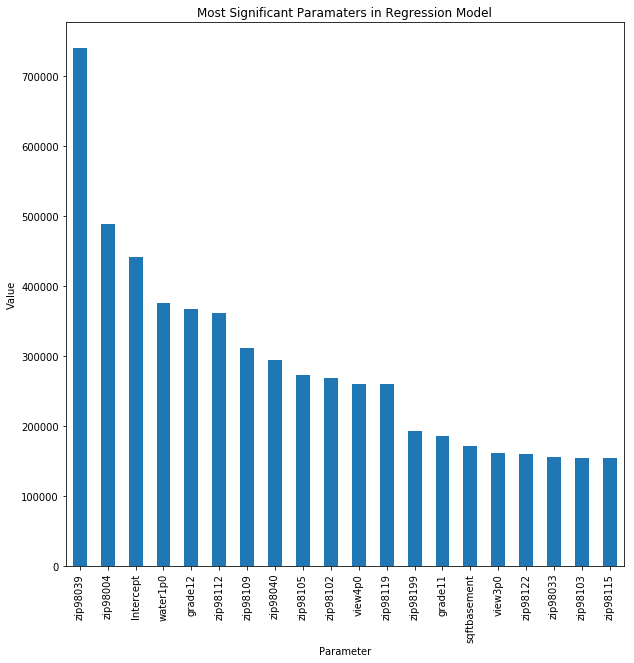

In [85]:
model.params.sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,10))
plt.title('Most Significant Paramaters in Regression Model')
plt.xlabel('Parameter')
plt.ylabel('Value')

<font color='green'>Confirm high accuracy under Train/Test/Split so as not to overfit. </font>

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print('R^2:',linreg.score(X, y))
    
X = df.drop(['price'],axis=1)
y = df.price

linear_regression(X,y)

R^2: 0.8325249797260971


R^2 is still 83% with train/test/split, minimal over-fitting.

<font color='green'>Let's understand several significant coefficients and their impact on the house price. </font>

<font color='green'>Variable 1: Whether the home is in a desirable zipcode. </font>

<font color='blue'>The model coefficient differs based on zip code. For example, the highest coefficient is zip code 98039, which corresponds to Medina, WA, followed by zip code 98004, which corresponds to Bellevue, WA. Houses are likely to go for a premium in these zip codes.</font>

<font color='green'>Variable 2: Whether the home has a waterfront view. </font>

<font color='blue'>The model coefficient is high for homes that have a waterfront view. Houses are likely to go for a premium if they are waterfront.</font>

<font color='green'>Variable 3: Whether the home has a grade of 12. </font>

<font color='blue'>Homes with high grades (eg., a grade of 12) go for higher value. </font>

<font color='green'>Next Steps: </font>

<font color='blue'>Analyze more variables: latitude, longitude, day of the week of sale. </font>

<font color='blue'>Run other types of algorithms, such as random forests or non-linear regression. </font>